## Regression - Linear Regression

In [1]:
# Simple Linear Regression
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (20.0,10.0)

data = pd.read_csv('G:\My Documents\Technical\Data Science - ML\Data Files/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [3]:
# Slope and constant
mean_x = np.mean(X)
mean_y = np.mean(Y)

m = len(X)
numer = 0
denom = 0

for i in range(m):
    numer += (X[i]-mean_x)*(Y[i]-mean_y)
    denom += (X[i]-mean_x)**2
b1=numer / denom
b0=mean_y-(b1 * mean_x)
            
print(b1,b0)

0.26342933948939945 325.57342104944223


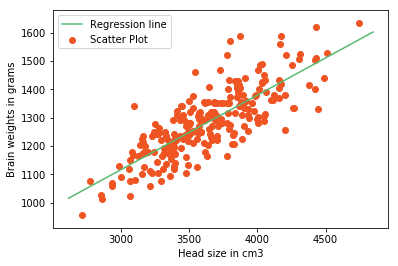

In [4]:
# plot
max_x = np.max(X)+100
min_x = np.min(X)-100

x=np.linspace(min_x,max_x,1000)
y=b0+b1*x

plt.plot(x,y, color='#58b970',label = 'Regression line')
plt.scatter(X, Y, c='#ef5423', label = 'Scatter Plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain weights in grams')
plt.legend()
plt.show()

In [5]:
# RMSE
rmse=0
for i in range(m):
    y_pred= b0+b1*X[i]
    rmse+=(Y[i]-y_pred)**2
rmse=np.sqrt(rmse/m)
print(rmse)

72.1206213783709


In [6]:
# R^2
ss_t=0
ss_r=0
for i in range(m):
    y_pred= b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

0.6393117199570003


In [7]:
# Using Sci-Kit - ML
from sklearn.linear_model import LinearRegression

In [8]:

X=X.reshape((m,1))
model=LinearRegression()
model.fit(X,Y)
Y_pred= model.predict(X)
model_score=model.score(X,Y)
model_score

0.639311719957

In [9]:
# MSE - ML
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y, Y_pred)
rmse= np.sqrt(mse)
rmse

72.1206213783709

In [10]:
# Gradient Descent
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('G:\My Documents\Technical\Data Science - ML\Data Files/student.csv')
print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


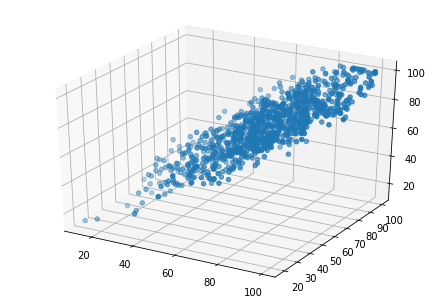

In [11]:
from mpl_toolkits.mplot3d import Axes3D

math=data['Math'].values
read=data['Reading'].values
write=data['Writing'].values

fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(math, read, write)
plt.show()

In [12]:
# Initial Cost Function
m = len(math)
x0 = np.ones(m)
X = np.array([x0,math,read]).T

B = np.array([0,0,0])
Y = np.array(write)
alpha = 0.0001

In [13]:
# Cost function
def cost_function(X,Y,B):
    m=len(Y)
    J = np.sum((X.dot(B) - Y)**2)/(2*m)
    return J

In [14]:
initial_cost = cost_function(X,Y,B)
print(initial_cost)

2470.11


In [15]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

data = pd.read_csv('G:\My Documents\Technical\Data Science - ML\Data Files/student.csv')
df = pd.DataFrame(data)
X = add_constant(df)

In [23]:

pd.Series([variance_inflation_factor(X.values, i)
     for i in range (X.shape[1])],
    index = X.columns)

const      24.937662
Math        2.960544
Reading    11.368520
Writing    11.097569
dtype: float64

In [16]:
# Categorical Data Analysis
# Frequency Table
# One Way Frequency Table

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

os.chdir('G:\My Documents\Technical\Data Science - ML\Data Files')
train = pd.read_csv('diamonds.csv')
my_tab  = pd.crosstab(index = train["clarity"],
                                columns="count")
my_tab

col_0,count
clarity,
I1,741
IF,1790
SI1,13065
SI2,9194
VS1,8171
VS2,12258
VVS1,3655
VVS2,5066


In [17]:
type(my_tab)

pandas.core.frame.DataFrame

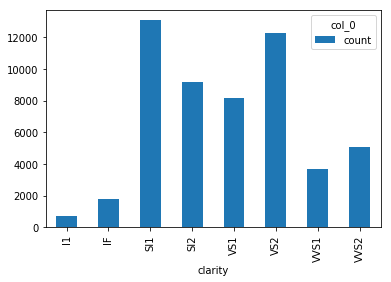

In [18]:
my_tab.plot.bar()

In [19]:
print(my_tab.sum(),"\n")
print(my_tab.shape,"\n")
my_tab.iloc[1:7]

col_0
count    53940
dtype: int64 

(8, 1) 



col_0,count
clarity,
IF,1790
SI1,13065
SI2,9194
VS1,8171
VS2,12258
VVS1,3655


In [20]:
my_tab/my_tab.sum()

col_0,count
clarity,
I1,0.013737
IF,0.033185
SI1,0.242214
SI2,0.170449
VS1,0.151483
VS2,0.227253
VVS1,0.067760
VVS2,0.093919


In [21]:
clarity_color_table = pd.crosstab(index=train["clarity"],
                                 columns=train["color"])
clarity_color_table

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,42,102,143,150,162,92,50
IF,73,158,385,681,299,143,51
SI1,2083,2426,2131,1976,2275,1424,750
SI2,1370,1713,1609,1548,1563,912,479
VS1,705,1281,1364,2148,1169,962,542
VS2,1697,2470,2201,2347,1643,1169,731
VVS1,252,656,734,999,585,355,74
VVS2,553,991,975,1443,608,365,131


In [25]:
# Test of Independence
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(train['clarity'], train['color']))

(2047.0791639481313,
 0.0,
 42,
 array([[  93.0714683 ,  134.58615128,  131.08309232,  155.12369299,
          114.07608454,   74.48464961,   38.57486096],
        [ 224.82851316,  325.11364479,  316.65146459,  374.72525028,
          275.56840934,  179.92918057,   93.18353726],
        [1640.99694105, 2372.9663515 , 2311.20189099, 2735.0756396 ,
         2011.34149055, 1313.28197998,  680.13570634],
        [1154.78958102, 1669.88539118, 1626.42098628, 1924.70611791,
         1415.40556174,  924.17256211,  478.61979978],
        [1026.29820171, 1484.08021876, 1445.45202076, 1710.54749722,
         1257.91590656,  821.34152762,  425.36462736],
        [1539.63570634, 2226.39276974, 2168.44338154, 2566.1352614 ,
         1887.10478309, 1232.16307008,  638.12502781],
        [ 459.07721542,  663.84936967,  646.57044865,  765.1512792 ,
          562.68298109,  367.39729329,  190.27141268],
        [ 636.30237301,  920.12610308,  896.17671487, 1060.5352614 ,
          779.90478309,  509.22